# Cryptography Lecture 2

<i> Discrete Logarithm problem, Diffie Helman key exchange and El-Gamal. </i>

## What is a group?

A group $(G, \cdot)$ is a set together with a binary operation $\cdot: G\times G \rightarrow G$ such that
- for all $a,b,c\in G$ we have that $(a\cdot b)\cdot c = a \cdot (b\cdot c)$
- There is an element $e$ (called the identity element) in $G$ such that for all $a \in G$, we have $e \cdot a = a \cdot e = a$.
- For every $a\in G$ there is a corresponding $b\in G$ such that $a\cdot b = b\cdot a = e$. 

Furthermore if for any $a,b\in G$ one has $a \cdot b = b\cdot a$ then we say that the group $(G,\cdot)$ is commutative. 

We can figure out some quick properties from these,
- If $e$ and $e'$ are both identity elements then $e = e \cdot e' = e'$. 
- If $a \in G$ is given and $b$ and $b'$ are both inverse elements of $a$, then $b = b\cdot e= b\cdot(a \cdot b') = (b \cdot a) \cdot b'= e \cdot b' = b'$. We call this unique element as $a^{-1}$ or $-a$ depending on whether we denote the group operation additively or multiplicatively.
### Examples of groups:
- The group of residue classes $a \pmod m$ such that $\operatorname{gcd}(a,m) = 1$, under multiplication.
- The group of residue classes $a \pmod m$ under addition.
- Points $(x,y) \in (\mathbb{Z}/p\mathbb{Z})^2$ satisfying the equation $y^2 = x^3 + ax + b$ such that $4a^3 + 27b^2 \not\equiv 0\pmod{p}$ with addition defined as 
$$(x_1, y_1) \oplus (x_2, y_2) = (\lambda^2 - x_1 - x_2, \lambda(2x_1 + x_2 - \lambda^2) -y_1) $$
where $$ \lambda  = \begin{cases}\frac{y_2 - y_1}{x_2-x_1} &\text{ if }  x_1 \neq x_2\\ \frac{3x^2 + a}{2y} &\text{ if } x_1 = x_2 = x  \end{cases}$$
This is called the modulo $p$ points of an Elliptic curve.
- The set of real numbers $x>0$ with the operation as multiplication.
- The set of upper triangular $5\times 5$ matrices with 1's on the diagonal, under matrix multiplication.


### Order of an element in a group
- The least positive integer $e$ such that $g^e = 1$ in $G$ is called the order of the element $g \in G$, and the order of $g$ divides $|G|$ by Lagrange's theorem. 
- If $e$ is the order of an element $g$, ($\operatorname{ord}_G(g) = e$) then if $g^f =1 $ in $G$, then $e | f$. 

## Discrete Logarithm Problem for a group $G$

For some group $(G,\cdot)$ given $g$ and $A$ such that $g^a = A$ in $G$ for some integer $a$, find the integer $a$ in an expedient manner. 

In other words, is it easy to find, $a$ such that
$$ \underbrace{g \cdot g \cdot \ldots g}_{a \text{ times }} = A.$$

## The Diffie Helman Probelm
The Diffie Helman problem is actually weaker than that (or is it?). The problem is given $g^a$ and $g^b$ is there an efficient algorithm to find $g^{ab}$. It is clear that if one can solve the Discrete Logarithm Problem (DLP) for the group $((\mathbb{Z}/p\mathbb{Z})^\times , *)$ efficiently, then one can solve the Diffie Helman Problem (DHP). It is not known if an efficient solution of the DHP implies an efficient solution for DLP.

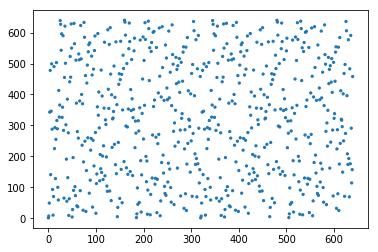

In [2]:
def fastexp(x,n,m):
    z = 1
    while n!=0:
        if n%2==1:
            z = (z*x)%m
        x = (x*x)%m
        n = n//2
    return z

import matplotlib.pyplot as plt
x = range(0,640)
y = [fastexp(7,i,641) for i in x]
s = [5 for i in x]

plt.scatter(x,y,s)
plt.show()

In [3]:
def DLPslowsolver(A,g,p):
    #Finds a such that g^a = A mod p.
    result = 1
    for a in range(p):
        result = (result*g)%p
        if result == A:
            return a
    print("no solution")
    return None

DLPslowsolver(15,8,100000001)

no solution


### Easy case of DLP,

For the additive group $G = (\mathbb{Z}/m\mathbb{Z}, +)$ the question is to find the a such that 
$$ \underbrace{g + g + \cdots + g}_{a \text{ times}} = A$$ i.e. $ag \equiv A\pmod m$. Firstly, if $g$ and $m$ contain any common divisors, we can cancel them out, so let's assume they are relatively prime. Then if $g^{-1}$ is the multiplicative inverse of $g$ modulo $m$, we get that $$a \equiv Ag^{-1} \pmod m.$$

Efficiently finding the multiplicative inverse is done via Bezout's lemma.

## Bezout's Lemma

Given two integers $n$ and $m$ and $d = \operatorname{gcd}(n,m)$ there existstwo integers $u$ and $v$ such that $$nu + mv = d.$$

<i> Proof: </i> Consider the set $L = \{an + bm >0: a,b\in \mathbb{Z}\}$ and consider $\min(L)= d = nu + mv$. If $e$ is any common divisor of $n$ and $m$, it divides any integer linear combination, and so any element in $L$, in particular $e | d$. Now we show that $d$ is a common divisor of $n$ and $m$. If we had $$n = dq + r$$ with $0\leq r <d$, then substituting the expression for $d$, we have $$r = n - dq = n - (nu + mv)q = n(1-uq) + m(-vq)\in L,$$ and since $d$ is the smallest positive linear combination in this set, $r = 0$, i.e. $d | n$. Similarly $d | m$, i.e. $d$ is a common divisor, and it is a multiple of any other common divisor, it is the greatest common divisor. 


Keeping track of quotients in the Euclidean algorithm gives us the $u$ and $v$: Let $n= 152$ and $m= 96$

| g | u  | v |
|----------|-------------|--------|
|  152   |   1       | 0 |
|96 |0  | 1 |
|56 | 1 | -1|
|40 | -1| 2 |
|16 | 2 | -3|
|8  | -5|8|

Indeed,

In [4]:
152*(-5)+ 96*(8)

8

In [6]:
def bezout(n,m):
    (g,u,v) = (n,1,0)
    (e,s,t) = (m,0,1)
    r = g%e
    while r != 0:
        q = g//e
        (eprime, sprime,tprime) = (e,s,t)
        (e,s,t) = (r,u - q*s,v  - t*q)
        (g,u,v) = (eprime,sprime,tprime)
        r = g%e
    return (e,s,t)

def gcd(n,m):
    (g,u,v) = bezout(n,m)
    return g

n = 92384723423423498478
m = 1923847923423412341324
(g,u,v) = bezout(n,m)
print("gcd(n,m) = ", g, )
print(" and ")
print("nu + mv =",n,"*",u,"+" ,m,"*",v, "=", n*u + m*v)

gcd(n,m) =  6
 and 
nu + mv = 92384723423423498478 * -135502497430774700201 + 1923847923423412341324 * 6506938826042621491 = 6


## The Group $(\mathbb{Z}/m \mathbb{Z})^*, \times)$.

Consider all the residue classes modulo $m$, under multiplication. The operation is associative, and identity element is $1$. But are there inverses? Not necessarily, for example consider the set of residue classes modulo $10$.

|$\times$|-|0|1|2|3|4|5|6|7|8|9|
-|-|-|-|-|-|-|-|-|-|-|-|
|0|-|0|0|0|0|0|0|0|0|0|0|
|1|-|0|1|2|3|4|5|6|7|8|9|
|2|-|0|2|4|6|8|0|2|4|6|8|
|3|-|0|3|6|9|2|5|8|1|4|7|
|4|-|0|4|8|2|6|0|4|8|2|6|
|5|-|0|5|0|5|0|5|0|5|0|5|
|6|-|0|6|2|8|4|0|6|2|8|4|
|7|-|0|7|4|1|8|5|2|9|6|3|
|8|-|0|8|6|4|2|0|8|6|4|2|
|9|-|0|9|8|7|6|5|4|3|2|1|

Notice that those elements which are relatively prime to $10$ actually do have inverses. The multiplicative group we are interested in is
$$(\mathbb{Z}/10\mathbb{Z})^\times =\{1,3,7,9\} $$
and it has $4$ elements, which we denote by $\phi(10) = 4$.

### Finding Multiplicative modular inverse

Now given $x$ and $m$ with $\operatorname{gcd}(x,m) = 1$ we can find $u$ such that 
$$xu \equiv 1 \pmod{m},$$ afterall the g.c.d. condition states by Bezout's lemma that there are integers $u$ and $v$ such that 
$$xu + mv = 1.$$

Now reducing both sides modulo $m$ we get that $xu \equiv 1 \pmod m$. 

This calculation is efficient as well, because finding the $u$ and $v$ in Bezout's lemma is as efficient as the Euclidean algorithm.

In [7]:
def inverse(x,n):
    (g,u,v) = bezout(x,n)
    if g!=1:
        return None
    else:
        return u
    
x = 2938472847
m = 109987987987987489
a = inverse(x,m)
print(a)

28056777069990099


In [8]:
x*a

82444077594498124470341853

In [9]:
(x*a)%m

1

## El Gamal Encryption

The ElGamal method of public key encryption which came after the RSA (1978 vs 1985) but is logically more close to the Diffie Helman (1976). 

Alice agrees on a prime p and an element of large <i>prime</i> order $g$.
Also choses a private key $a$. 
Alice computes $A = g^a \pmod{p}$, publishes $A$.

Bob has a message $m$ which is recorded as a number less than p and greater than 2.
Bob choses an ephemeral key $k$ to be used only once and computes $c_1 = g^k\pmod p$ and $c_2 = mA^k \pmod p$, then sends $c = (c_1,c_2)$. This is his ciphertext, which he sends to Alice.

Then Alice, who doesn't know the ephemeral key $k$ can get rid of the $A^k$ factor next to the message by computing $x \equiv c_1^a \pmod p$ which is equivalent to $A^k$ and then computes $x^{-1} c_2 \equiv m \pmod p$.

In [24]:
import random

def ElGamalKeyGenerator(a,g,p):
    A = fastexp(g,a,p)
    return A

def ElGamalEncryptor(A,g,p,m):
    #encrypts a message using the ElGamal encryption technique
    k = random.randint(p//2,p-2)
    c1 = fastexp(g,k,p)
    c2 = (m*fastexp(A,k,p))%p
    return (c1,c2)

def ElGamalDecryptor(c, a, p):
    #The ciphertext should be in the form (c1,c2)
    (c1,c2) = c
    x = fastexp(c1,a,p)
    m = (c2*inverse(x,p))%p
    return m

In [31]:
from sympy import isprime, factorint
p = 1234567891
g = 2
a = random.randint(p//4, 3*p//4)
print("p is Prime:", isprime(p))

A = ElGamalKeyGenerator(a,g,p)

plaintext = "yes"
m = int.from_bytes(plaintext.encode(), 'big')
print("message is:", m)
c = ElGamalEncryptor(A,g,p,m)
print("ciphered is:", c)

p is Prime: True
message is: 7955827
ciphered is: (830582440, 372544350)


In [32]:
m = ElGamalDecryptor(c,a,p)
print("decryption gives", m)

decryption gives 7955827


### ElGamal is as Difficult as the DHP

Let us have access to a Diffie-Helman oracle, meaning that there is a function (whose inner workings we do not know), such that $$\operatorname{DHO}(g,p,A= g^a,B=g^b)  = g^{ab} \pmod p.$$

With access to such an oracle we can crack the ElGamal problem, if we intercept $c = (c_1,c_2)$ and also the integers $A, g,p$ which were public information to begin with. Note that $c_1 \equiv g^k \pmod p$ and $A \equiv g^a \pmod p$ so that we get,
$$\operatorname{DHO}(g,p, c_1 = g^k, A = g^a) = g^{ak} \equiv A^k \pmod{p}$$
And so we can then find the multiplicative inverse of $A^k$, multiply it by $c_2$ in order to obtain $m$. 

Conversely now assume that we have an ElGamal Oracle, such that $$\operatorname{EGO}(g,p,A = g^a,c = (c_1 = g^k, c_2 = mA^k)) \equiv (c_1^a)^{-1} c_2 \equiv m \pmod p,$$ i.e. somehow the oracle decrypts the ciphertext efficiently. Now we want to solve the DHP, and so given $A = g^a$ and $B = g^b$, we input $$\operatorname{EGO}(g,p, A = g^a, c = (B = g^b, 1)) = g^{-ab}\pmod p.$$ Taking the inverse modulo $p$ of the output gives us the solution to the Diffie Helman Problem.



## Baby-Step Giant Step

There is a method to solve the Discrete Logarithm Problem for any group $G$ in $O(\sqrt{N} \log(N) )$ many steps, where $N = |G|$. We are trying to solve the problem $$g^x \equiv h \text{ in } G.$$

Let $n = \lfloor\sqrt{N}\rfloor + 1$. Note that $n > \sqrt{N}$. Make two lists, both of length about $n$.
- $e, g, g^2, \ldots, g^{n-1}$
- $h, h*g^{-n}, h*g^{-n}, h*g^{-2n}, \ldots , h*g^{-n^2}$.
Find a match between these two lists (which exists). Then we have $$g^i = h*g^{-jn}$$ for some $0\leq i < n$ and $0\leq j \leq n$. This means that $$h \equiv g^{i + nj} \text{ in }  G.$$

If three is a solution to $g^x \equiv h$, then there is a match between these sets. To see this, first divide $x$ by $n$ with remainder. Since $x < N$, we have that $x = nq + r$ with $q \leq N/n < n$, and $0\leq i < n$. In that case $h = g^{q n + j}$, or in other words $$h*g^{-qn} = g^r$$


In [96]:
#Solves g^x = h in Z/mZ
from math import sqrt 
from math import floor
from sympy.ntheory.factor_ import totient as phi

def BabyStepGiantStep(g,h,m,N = phi(m)):
    #solves the Discrete logarithm problem if g has order $N$ in the group Z/mZ
    n = floor(sqrt(N)) + 1
    G = fastexp(g,n,m)
    L1 = [fastexp(g,i,m) for i in range(n)]
    L2 = [(h*inverse(fastexp(G,j,m),m))%m for j in range(n)]
    common = set(L1) & set(L2)
    if common==set():
        print("There is no solution")
        return None
    else:
        c = common.pop()
        i = L1.index(c)
        j = L2.index(c)
        return (i + n*j)%N

BabyStepGiantStep(16,fastexp(17,4,101),101,N= 25)


5

In [97]:
fastexp(16,5,101)

95

## Pohlig-Helman

There is a way to attack the Discrete Logarithm Problem. This depends on whether $p-1$ has a lot of small prime factors. The method requires the so-called Chinese Remainder Theorem.

### Chinese Remainder Theorem
Let $m = m_1m_2$ with $\operatorname{gcd}(m_1,m_2) = 1$. Then there is an isomorphism of rings:
$$ \begin{align*}\mathbb{Z}/m_1m_2 \mathbb{Z} &\longrightarrow (\mathbb{Z}/m_1\mathbb{Z} ) \times (\mathbb{Z}/m_2\mathbb{Z})\\
x \pmod {m_1m_2} &\longmapsto (x \pmod {m_1}, x\pmod {m_2})\end{align*}$$
which does also translate to an isomorphism of their group of invertible elements:
$$ (\mathbb{Z}/m_1m_2 \mathbb{Z})^* \longrightarrow (\mathbb{Z}/m_1\mathbb{Z} )^* \times (\mathbb{Z}/m_2\mathbb{Z})^*$$

The inverse of the above map is given as, 
$$ \begin{align*}(\mathbb{Z}/m_1\mathbb{Z} ) \times (\mathbb{Z}/m_2\mathbb{Z}) &\longrightarrow \mathbb{Z}/m_1m_2 \mathbb{Z}\\
(x_1 \pmod {m_1}, x_2\pmod {m_2}) &\longmapsto x_2 m_1\overline{m_1} + x_1 m_1 \overline{m_1} \end{align*}$$
where $\overline{m_1}$ is an integer such that $m_1\overline{m_1} \equiv 1 \pmod {m_2}$ and $\overline{m_2}$ is such that $m_2 \overline{m_2} \equiv 1 \pmod{m_1}$.


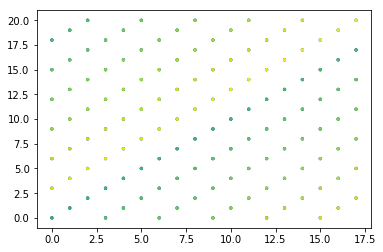

In [35]:
m1 = 18
m2 = 21
m1inv = inverse(m1,m2)
m2inv = inverse(m2,m1)

from mpl_toolkits.mplot3d import Axes3D

r = range(0,m1*m2)
x = [x%m1 for x in r]
y = [y%m2 for y in r]
s = [5 for i in r]

plt.scatter(x,y,c = r, s=s)
plt.show()


In [44]:
def CRT(xs, ms):
    #The input ms =[m1,m2,...,m_k] is a sequence of pairwise relatively prime moduli. xs =[x1,x2,... x_k] are integers 
    #modulo m's. The output is an integer x that is congurent to x_i modulo m_i for all the elements in the list.
    x = 0
    m = 1
    for (y,n) in zip(xs,ms):
        x = SimpleCRT(x,y,m,n)
        m = n*m
    return x
    
def SimpleCRT(x,y,m,n):
    #outputs an integer modulo mn that is congruent to x modulo m and y modulo n
    if gcd(m,n)!=1:
        print("Moduli are not relatively prime")
        return None
    minv = inverse(m,n)
    ninv = inverse(n,m)
    return (x*n*ninv + y*m*minv)%(m*n)


x = CRT([1,2,3],[11,12,13])
print("x =", x,'\n x mod 11 =', x%11, '\n x mod 12 =', x%12,'\n x mod 13 =', x%13)

x = 1706 
 x mod 11 = 1 
 x mod 12 = 2 
 x mod 13 = 3


The Algorithm is as follows. Assume that the group $G$ is of order $N$ which factors as
$$N = q_1^{k_1} \ldots q_r^{k_r}.$$ For each prime factor $q_i^{k_i}$ raise both sides of the equation to the power of  $N/q_i^{k_i}$.

As an example take the multiplicative group $(\mathbb{Z}/101 \mathbb{Z})$ which has order $100 = 4 \times 25$. Consider an equation of the form, 
$$g^x \equiv A \pmod{101}$$
The solution to this equation is determined as $x \mod 100$, since $g^{100} = 1$ (note that $(\mathbb{Z}/101\mathbb{Z})^*$ has $\phi(101)= 100$ elements. Now we exponentiate both sides to $4$-th and $25$-th powers:
$$(g^{4x} \equiv A^{4} \pmod{101}$$ is solvable quickly becasue $g^4$ has order at most $25$ not $100$. Also $$g^{25x} \equiv A^{25}$$ is solvable quickly because the $g^{25}$ has order $4$. This gives two conditions on $x \equiv x_1 \pmod{4}$ and $x \equiv x_2 \pmod{25}$ and we solve them using Chinese remainder theorem to get a solution $x \pmod{100}$.   

In [65]:
import sympy

p = 12345678910111
sympy.isprime(p)

True

In [73]:
sympy.factorint(p-1)

{2: 1, 3: 1, 5: 1, 7: 1, 13: 1, 67: 1, 107: 1, 630803: 1}

In [98]:
from sympy.ntheory.factor_ import totient as phi

def PohligHelman(g,A,p,N = phi(p)):
    fac = sympy.factorint(N)
    powerlist = [p**fac[p] for p in fac]

## Index Calculus

In [45]:
fastexp(2,25,101)

10

In [46]:
fastexp(17,25,101)

100

In [47]:
fastexp(2,4,101)

16

In [48]:
fastexp(17,4,101)

95

In [54]:
[fastexp(16,i,101) for i in range(6)]

[1, 16, 54, 56, 88, 95]

In [53]:
[fastexp(95,i,101) for i in range(6)]

[1, 95, 36, 87, 84, 1]

In [55]:
fastexp(2,30,101)

17